## Importing the Libraries

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

###Loading the Dataset

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/DSA DATASETS/Project Dataset.xlsx')

In [ ]:
data

BP  alcohol  smoking  weight changes  family history  \
0     115.224217        1        1               0               1   
1     130.143900        1        1               1               1   
2      98.026072        1        0               0               0   
3     142.166650        0        0               0               1   
4     151.962572        1        0               1               0   
...          ...      ...      ...             ...             ...   
7745  102.487570        0        0               0               0   
7746   92.809106        1        0               0               0   
7747   99.652630        1        0               0               0   
7748   96.065757        0        0               1               0   
7749  114.703609        0        0               0               1   

      serum creatinine         gfr         bun  serum calcium  hematuria  \
0             0.683683   32.946784    7.553739      10.039896          0   
1             3.809044   32.685035  141.347494       8.330543          1   
2             1.143827    2.079805   15.979104       9.419229          0   
3             4.804657  109.871407   53.307333       7.556631          1   
4             4.920235   42.214590  134.182157       7.289379          1   
...                ...         ...         ...            ...        ...   
7745          0.688916  111.058504   18.967824       9.596056          0   
7746          0.954734  117.383810   13.640228       9.728275          0   
7747          0.707893  102.319296   10.533178       8.950948          0   
7748          1.090707  104.198733   13.678739       9.176189          0   
7749          0.697870  108.818030   17.072300       9.117635          0   

      oxalate levels  urine ph  water intake  stress level  physical activity  \
0           2.878164  7.864308      2.314979             1                  2   
1           4.767639  4.920015      2.250649             2                  2   
2           1.818613  6.188115      2.542343             2                  2   
3           4.051686  5.278607      2.640812             0                  1   
4           3.240920  4.862923      3.148921             0                  2   
...              ...       ...           ...           ...                ...   
7745        1.933517  7.469796      1.812724             1                  1   
7746        2.461906  6.716795      3.187176             0                  0   
7747        1.185824  7.231773      2.795116             1                  0   
7748        2.410825  7.279558      2.635818             0                  0   
7749        1.410471  7.216383      2.726471             1                  0   

      ana  Diagnosis  
0       0          1  
1       1          1  
2       0          1  
3       1          1  
4       1          1  
...   ...        ...  
7745    0          0  
7746    0          0  
7747    0          0  
7748    0          0  
7749    0          0  

[7750 rows x 17 columns]

### Understanding the dataset

In [ ]:
data.shape

(7750, 17)

- 7750 rows
- 17 columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7750 entries, 0 to 7749
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BP                 7750 non-null   float64
 1   alcohol            7750 non-null   int64  
 2   smoking            7750 non-null   int64  
 3   weight changes     7750 non-null   int64  
 4   family history     7750 non-null   int64  
 5   serum creatinine   7750 non-null   float64
 6   gfr                7750 non-null   float64
 7   bun                7750 non-null   float64
 8   serum calcium      7750 non-null   float64
 9   hematuria          7750 non-null   int64  
 10  oxalate levels     7750 non-null   float64
 11  urine ph           7750 non-null   float64
 12  water intake       7750 non-null   float64
 13  stress level       7750 non-null   int64  
 14  physical activity  7750 non-null   int64  
 15  ana                7750 non-null   int64  
 16  Diagnosis          7750 

1. No Null values.
2. Datatypes are float and integer

In [ ]:
data.describe()

BP      alcohol      smoking  weight changes  family history  \
count  7750.000000  7750.000000  7750.000000     7750.000000     7750.000000   
mean    110.625657     0.578452     0.197419        0.556774        0.355097   
std      21.131444     0.493839     0.398077        0.496798        0.478574   
min      90.019471     0.000000     0.000000        0.000000        0.000000   
25%      96.066286     0.000000     0.000000        0.000000        0.000000   
50%     104.138793     1.000000     0.000000        1.000000        0.000000   
75%     114.549735     1.000000     0.000000        1.000000        1.000000   
max     179.991991     1.000000     1.000000        1.000000        1.000000   

       serum creatinine          gfr          bun  serum calcium    hematuria  \
count       7750.000000  7750.000000  7750.000000    7750.000000  7750.000000   
mean           1.206238    80.647013    26.833764       8.929786     0.154839   
std            0.951869    39.024513    33.255970       1.123836     0.361774   
min            0.500273     0.021317     7.000920       5.002407     0.000000   
25%            0.719560    47.991855    10.774476       8.737738     0.000000   
50%            0.893968   101.267905    14.445602       9.225767     0.000000   
75%            1.088315   113.418371    18.737393       9.635725     0.000000   
max            4.994009   119.923482   149.999395      10.199344     1.000000   

       oxalate levels     urine ph  water intake  stress level  \
count     7750.000000  7750.000000   7750.000000   7750.000000   
mean         2.339545     6.687928      2.522752      0.869677   
std          0.899705     0.885705      0.532321      0.783128   
min          1.000852     4.500576      1.500627      0.000000   
25%          1.683033     6.345428      2.086013      0.000000   
50%          2.195840     6.852097      2.532652      1.000000   
75%          2.716252     7.328011      2.961433      1.000000   
max          4.999965     7.999886      3.499595      2.000000   

       physical activity          ana    Diagnosis  
count        7750.000000  7750.000000  7750.000000  
mean            0.868258     0.154839     0.500000  
std             0.773354     0.361774     0.500032  
min             0.000000     0.000000     0.000000  
25%             0.000000     0.000000     0.000000  
50%             1.000000     0.000000     0.500000  
75%             1.000000     0.000000     1.000000  
max             2.000000     1.000000     1.000000

- The Statistical Description of the Dataset

## Visualisations
---

###1. Target Variable Distribution

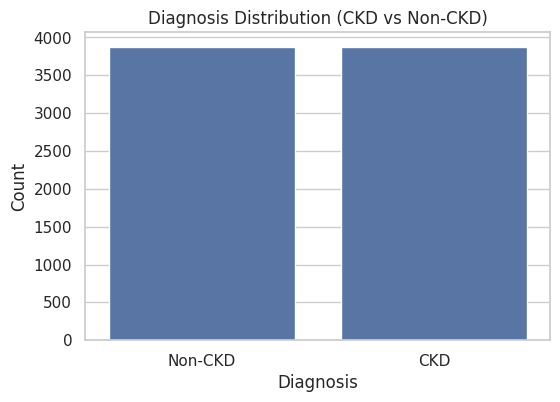

In [ ]:
# CKD - Chronic kidney disease
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=data)
plt.title("Diagnosis Distribution (CKD vs Non-CKD)")
plt.xticks([0, 1], ['Non-CKD', 'CKD'])
plt.ylabel("Count")
plt.show()


- The Dataset is balanced with same number of CKD and Non-CKD values

### 2. Correlation Heatmap

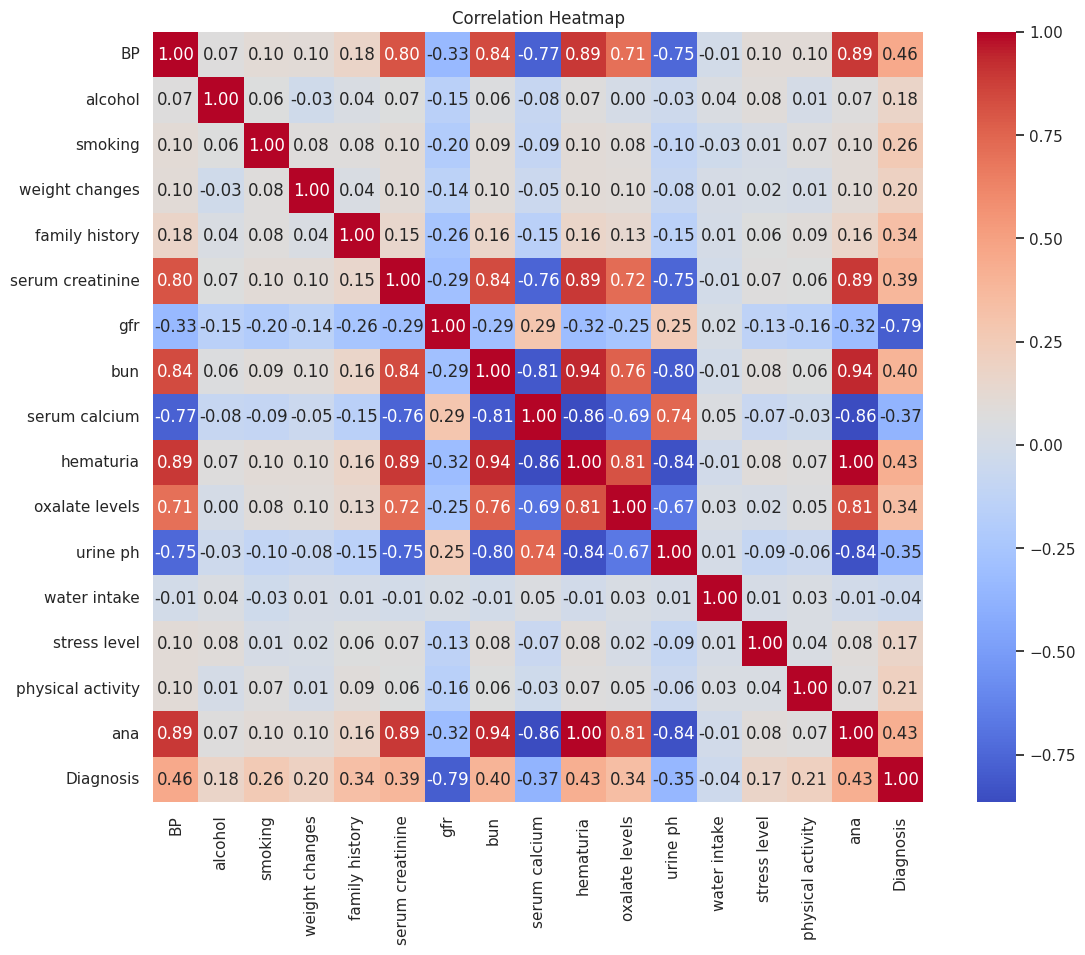

In [ ]:
plt.figure(figsize=(14, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

- Diagonsis and
    - ana has positive correlation.
    - bp has positive correlation
    - urine ph has negative correlation
    - serum calcium has negative correlation
    -Mgfr has strong negative correlation

- Strong negative correlation between GFR and creatinine/BUN – expected for kidney health.

### 3. Boxplots

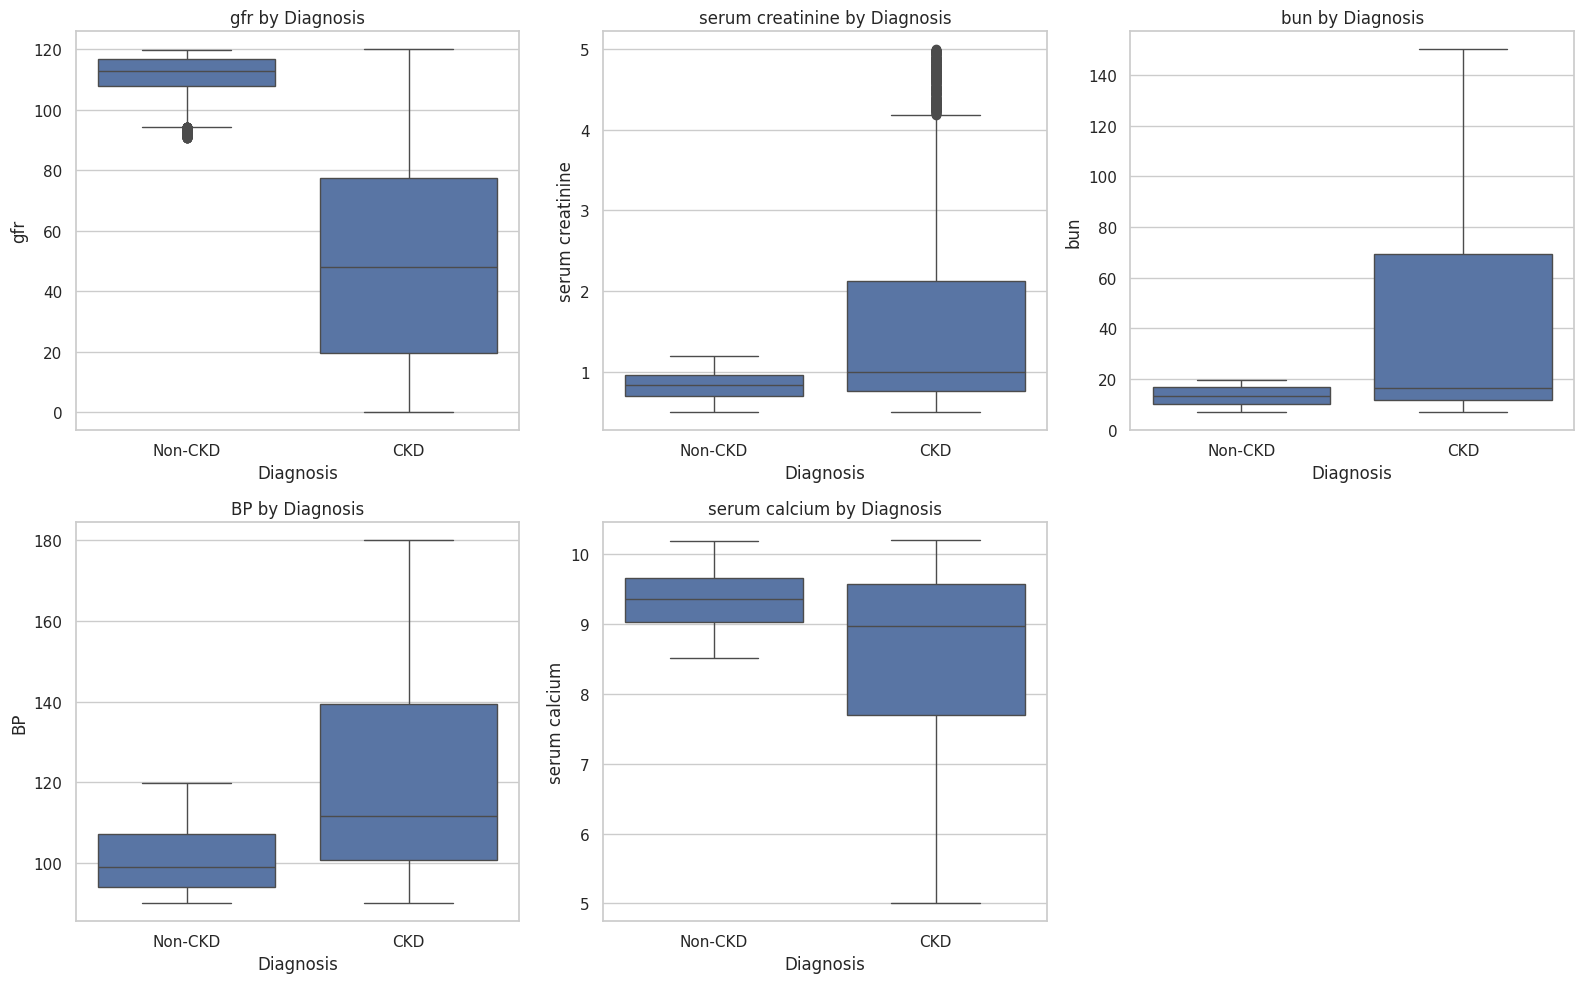

In [ ]:
key_features = ['gfr', 'serum creatinine', 'bun', 'BP', 'serum calcium']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Diagnosis', y=feature, data=data)
    plt.title(f"{feature} by Diagnosis")
    plt.xticks([0, 1], ['Non-CKD', 'CKD'])
plt.tight_layout()
plt.show()


- CKD patients often have:

    - GFR: Clearly lower in CKD patients.

    - Creatinine & BUN: Much higher in CKD patients.

    - Serum Calcium: Slightly lower for CKD group.

    - BP: Slight elevation in CKD patients but overlapping.

###4. Histograms

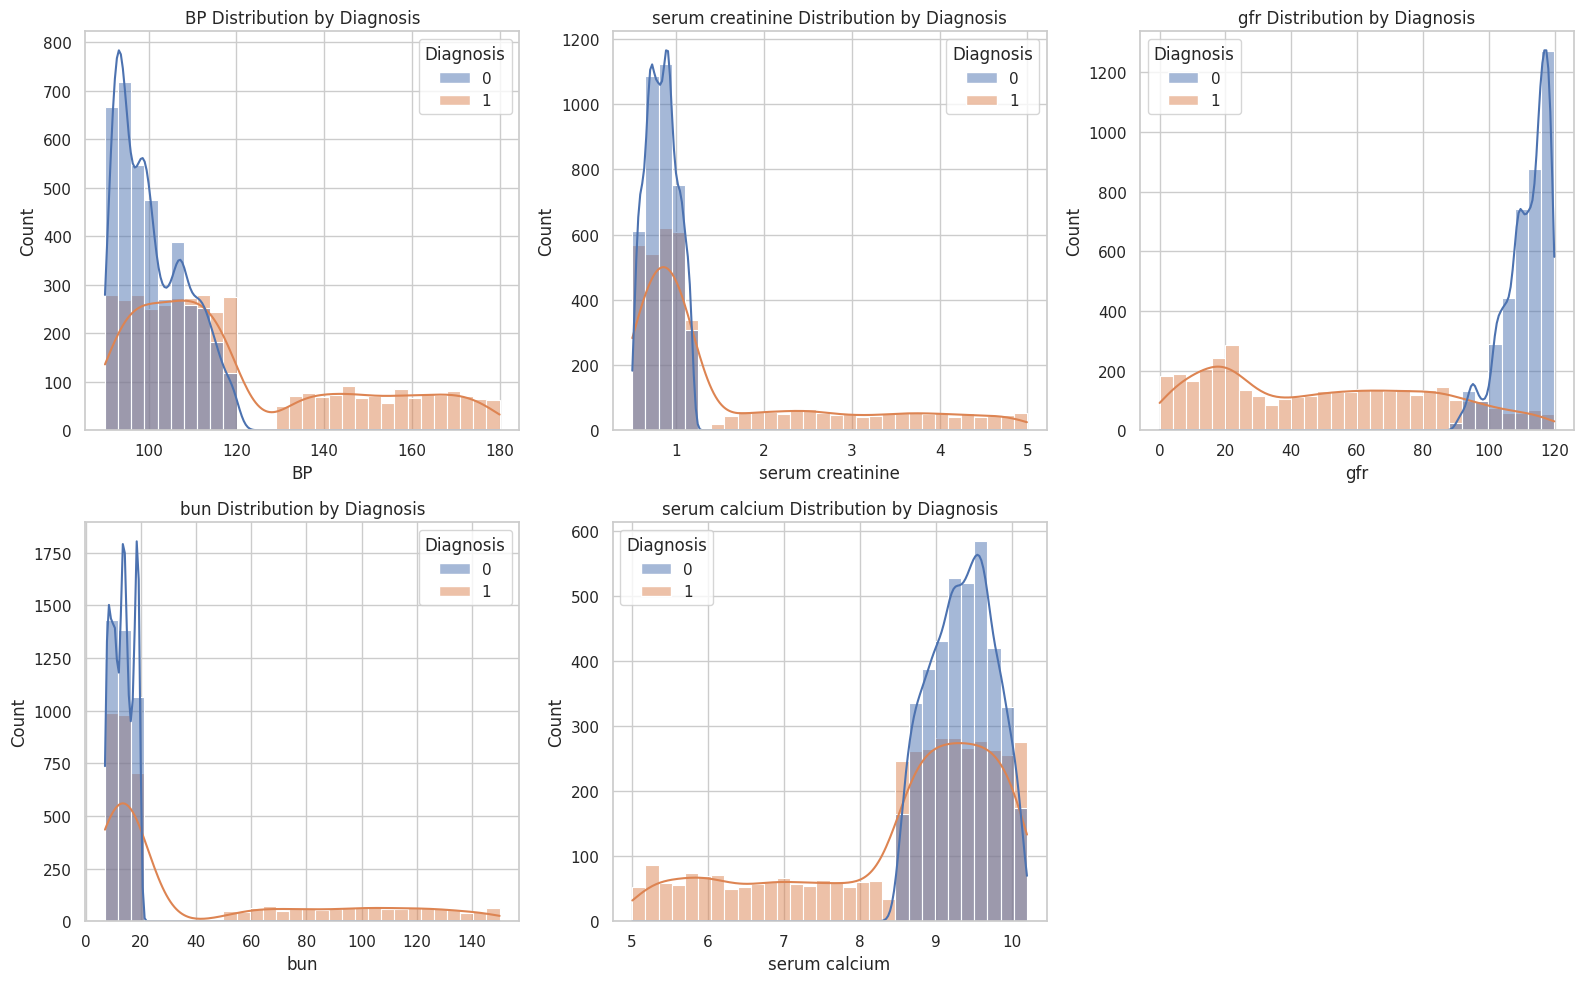

In [ ]:
num_features = ['BP', 'serum creatinine', 'gfr', 'bun', 'serum calcium']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=feature, hue='Diagnosis', bins=30, kde=True)
    plt.title(f"{feature} Distribution by Diagnosis")
plt.tight_layout()
plt.show()

###5. Count Plots

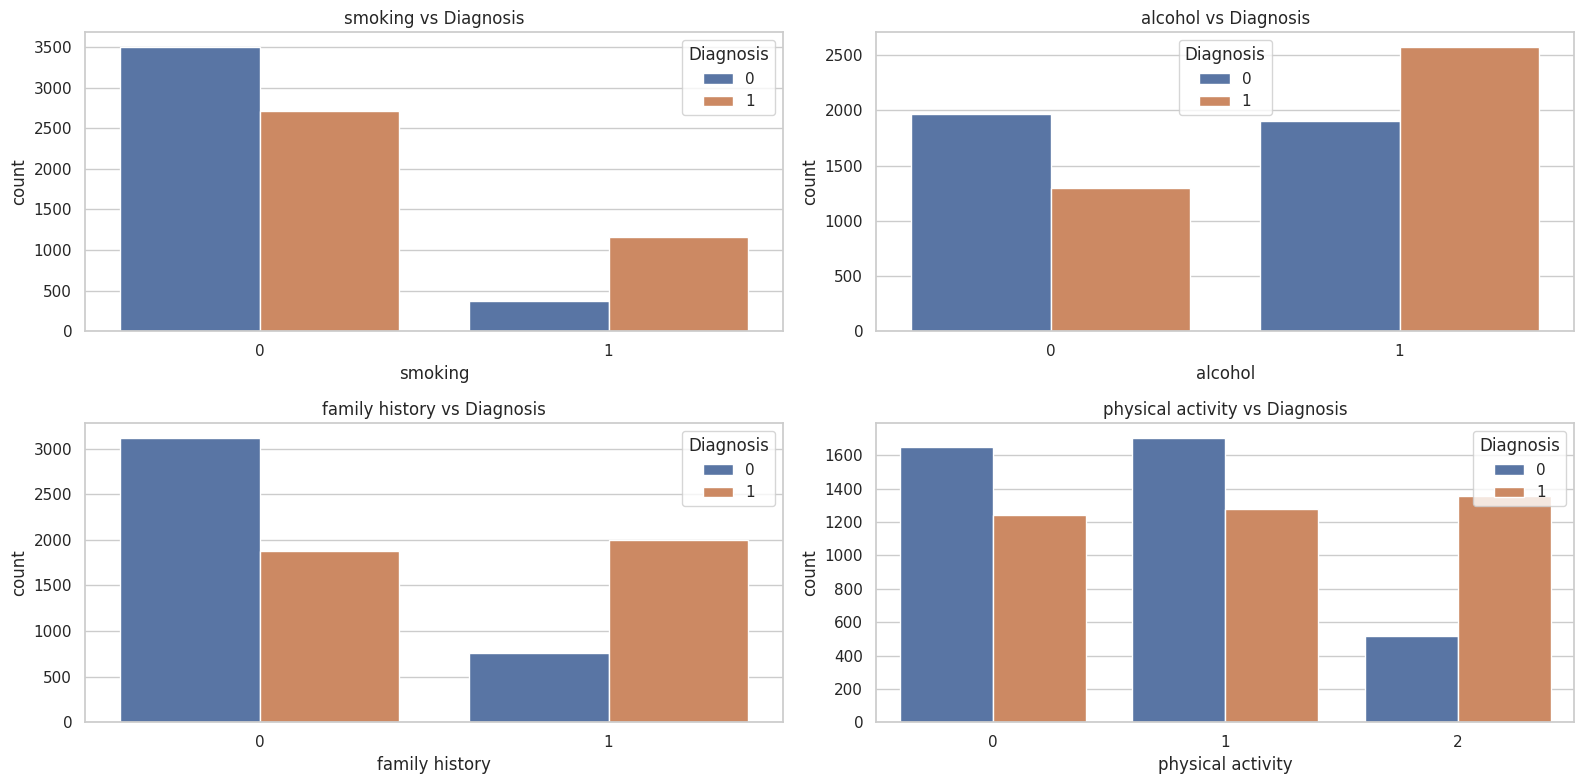

In [ ]:
cat_features = ['smoking', 'alcohol', 'family history', 'physical activity']
plt.figure(figsize=(16, 8))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Diagnosis', data=data)
    plt.title(f"{feature} vs Diagnosis")
plt.tight_layout()
plt.show()

- Lifestyle factors like smoking, alcohol, family history:

    - Slight increase in CKD patients, especially those with a positive family history.

    - Physical activity:

    - More CKD cases reported lower activity levels.

## Splitting the Dataset
---

In [ ]:
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

### Scaling the dataset

In [ ]:
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

### Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Model training

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LogisticRegression

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [ ]:
lr_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_lr, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)
}

In [ ]:
lr_results_df = pd.DataFrame([lr_results])
lr_results_df

Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression   0.97871   0.979212  0.97871  0.978706

Confusion matrix

---



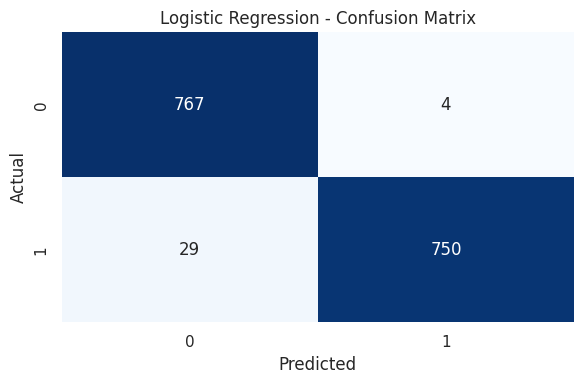

In [ ]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

True Positives (TP) = 745 : Model correctly predicted CKD for 745 patients.

True Negatives (TN) = 762 : Model correctly predicted Non-CKD for 762 patients.

False Positives (FP) = 9 : Model incorrectly predicted CKD when it was actually Non-CKD for 9 patients.

False Negatives (FN) = 34 : Model missed 29 actual CKD cases and labeled them as Non-CKD.

# Decision Tree Classifier

In [ ]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [ ]:
tree_results = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_tree),
    "Precision": precision_score(y_test, y_pred_tree, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_tree, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_tree, average='weighted', zero_division=0)
}

In [ ]:
tree_results_df = pd.DataFrame([tree_results])
tree_results_df

Model  Accuracy  Precision    Recall  F1 Score
0  Decision Tree  0.985806    0.98582  0.985806  0.985807

Confusion matrix

---



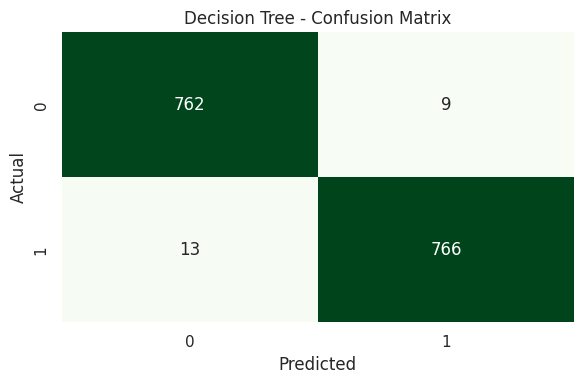

In [ ]:
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

True Positives (TP) = 745 : Model correctly predicted CKD for 745 patients.

True Negatives (TN) = 748 : Model correctly predicted Non-CKD for 748 patients.

False Positives (FP) = 23 : Model incorrectly predicted CKD when it was actually Non-CKD for 23 patients.

False Negatives (FN) = 34 : Model missed 34 actual CKD cases and labeled them as Non-CKD.

# Support Vector Machine

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
svm_results = {
    "Model": "SVM",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_svm, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_svm, average='weighted', zero_division=0)
}

In [ ]:
svm_results_df = pd.DataFrame([svm_results])
svm_results_df

Model  Accuracy  Precision  Recall  F1 Score
0   SVM      0.98   0.980503    0.98  0.979996

Confusion matrix

---



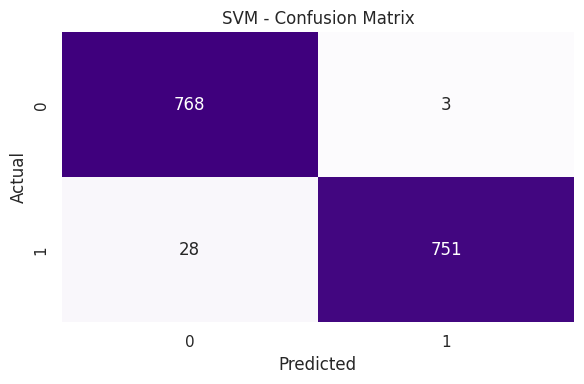

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples", cbar=False)
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

True Positives (TP) = 747 : Model correctly predicted CKD for 747 patients.

True Negatives (TN) = 768 : Model correctly predicted Non-CKD for 768 patients.

False Positives (FP) = 3 : Model incorrectly predicted CKD when it was actually Non-CKD for 3 patients.

False Negatives (FN) = 32 : Model missed 32 actual CKD cases and labeled them as Non-CKD.

# RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [ ]:
rf_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_rf, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)
}

In [ ]:
rf_results_df = pd.DataFrame([rf_results])
rf_results_df

Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.990968   0.991129  0.990968  0.990967

Confusion matrix

---



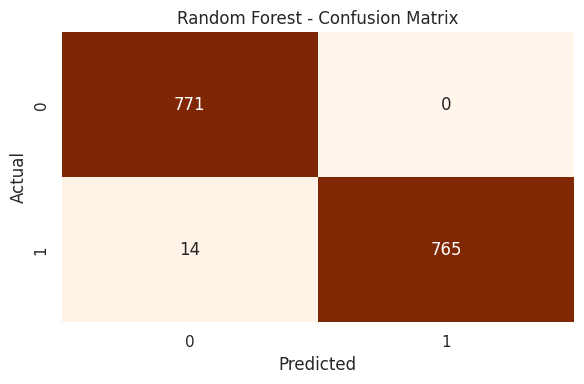

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

True Positives (TP) = 755 : Model correctly predicted CKD for 755 patients.

True Negatives (TN) = 754 : Model correctly predicted Non-CKD for 754 patients.

False Positives (FP) = 17 : Model incorrectly predicted CKD when it was actually Non-CKD for 17 patients.

False Negatives (FN) = 24 : Model missed 24 actual CKD cases and labeled them as Non-CKD

The Random Forest is best model here because:

High Recall : Captures most CKD cases (less false negatives).

High Precision : Avoids false positives.

Excellent F1-Score : Balanced performance

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    results[name] = {
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

results_data = pd.DataFrame(results).T
print(results_data)


                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.978710   0.994695  0.962773  0.978474
Random Forest        0.990323   0.998695  0.982028  0.990291
Decision Tree        0.983871   0.988342  0.979461  0.983881
SVM                  0.980000   0.996021  0.964056  0.979778


In [ ]:
import pickle

with open('CKD.pkl','wb') as file:
    pickle.dump(rf_model,file)

print("model saved succssfully")

model saved succssfully


In [ ]:
data['stress level'].unique()

array([1, 2, 0])

In [ ]:
data['physical activity'].unique()

array([2, 1, 0])

In [ ]:
data['ana'].unique()

array([0, 1])